In [1]:
"""Setup for Fused_ZS6D"""
stride = 14
image_size_sd = 960
image_size_dino = 840
layer = 11
facet = 'token'
model_type = 'dinov2_vitb14'

In [2]:
from external.sd_dino.extractor_sd import load_model

# Instantiating the stable diffusion model:
model_sd, aug_sd = load_model(diffusion_ver="v1-5", image_size=image_size_sd, num_timesteps=100)


LatentDiffusion: Running in eps-prediction mode
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, con

/home/kilian/miniconda3/envs/zs6d_sd_dino/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
The checkpoint state_dict contains keys that are not used by the model:
  model_ema.{decay, num_updates}
backbone.feature_extractor.,category_head.clip.clip.,clip_head.clip.clip.
backbone.feature_projections.2.0.conv1.weight
backbone.feature_projections.2.0.shortcut.weight
backbone.feature_projections.3.0.conv1.weight
backbone.feature_projections.3.0.shortcut.weight
backbone.feature_projections.4.0.conv1.weight
backbone.feature_projections.4.0.shortcut.weight
backbone.feature_projections.5.0.conv1.weight
backbone.feature_projections.5.0.shortcut.weight


In [3]:
from zs6dsddino import ZS6DSdDino
import os
import json

# Loading the config file:
with open(os.path.join("./zs6d_configs/bop_eval_configs/cfg_ycbv_inference_bop_sd_dino.json"), "r") as f:
    config = json.load(f)

# Instantiating the pose estimator:
# This involves handing over the path to the templates_gt file and the corresponding object norm_factors.
pose_estimator_sd_dino = ZS6DSdDino(model_sd, aug_sd, image_size_dino, image_size_sd, layer, facet,
                                    config['templates_gt_path'], config['norm_factor_path'], model_type=model_type,
                                    stride=stride)


Using cache found in /home/kilian/.cache/torch/hub/facebookresearch_dinov2_main
/home/kilian/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:43: UserWarning: xFormers is available (SwiGLU)
  warnings.warn("xFormers is available (SwiGLU)")
/home/kilian/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:27: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")
/home/kilian/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")
100%|██████████| 21/21 [03:12<00:00,  9.17s/it]


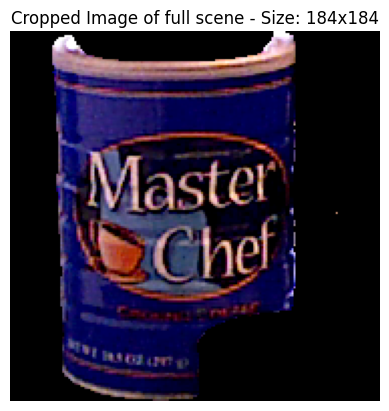

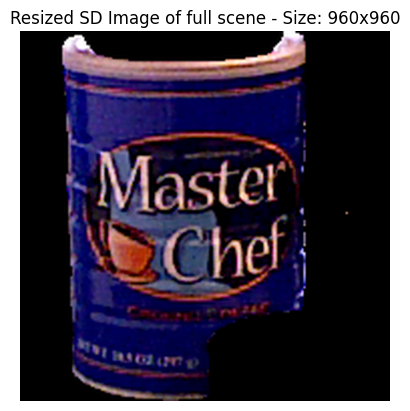

Shape of SD features: torch.Size([1, 1, 3600, 384])
Shape of DINO features: torch.Size([1, 1, 3600, 768])
Shape of SD-DINO features: torch.Size([1, 1, 3600, 1152])


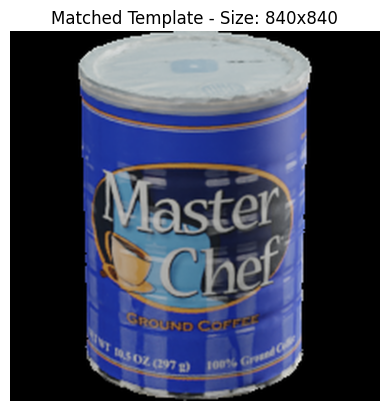

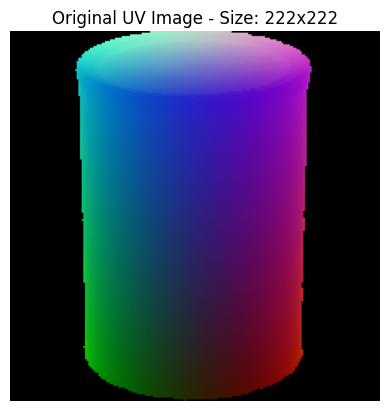

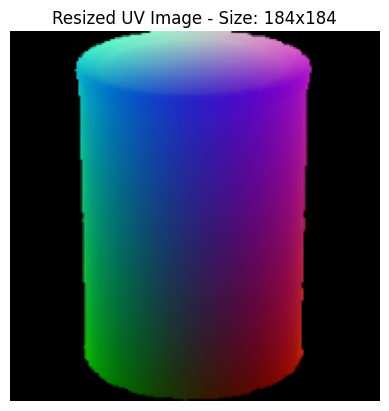

valid points 1
[(133, 127), (136, 115), (136, 118), (139, 108), (154, 35), (161, 62), (161, 65), (161, 69), (167, 62), (167, 81), (170, 47), (170, 53), (170, 81), (173, 75), (173, 78), (13, 32), (16, 26), (19, 23), (19, 26), (19, 29), (115, 41), (164, 32), (167, 26), (170, 32), (173, 32), (173, 38), (173, 41), (176, 38), (173, 29), (182, 87), (32, 127), (35, 111), (41, 130), (44, 118), (44, 130), (47, 118), (50, 121), (50, 124), (50, 127), (53, 127), (78, 130), (121, 130), (130, 124), (32, 133), (32, 139), (32, 142), (35, 133), (35, 136), (38, 136), (41, 133), (50, 139), (10, 19), (35, 23), (50, 142), (62, 26), (65, 26), (90, 23), (157, 26), (50, 26), (53, 139), (56, 29), (59, 35), (62, 29), (121, 41), (56, 96), (59, 56), (108, 93), (121, 65), (121, 93), (121, 102), (121, 118), (124, 102), (124, 111), (127, 93), (130, 121), (19, 139), (23, 133), (26, 133), (26, 136), (26, 139), (29, 121), (75, 124), (65, 105), (69, 87), (69, 96), (69, 115), (75, 72), (75, 93), (75, 108), (78, 99), (78,

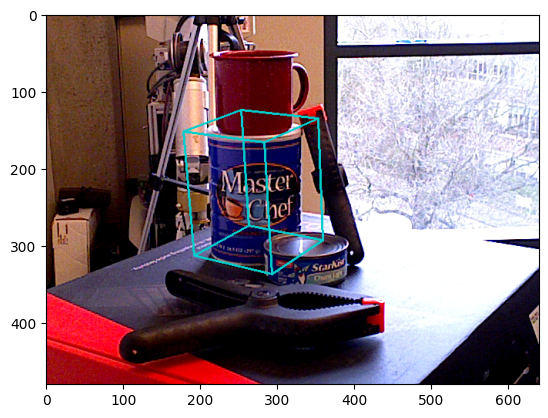

Pose estimation time: 28.228865146636963
R_est: [[ 0.83844091 -0.54320056  0.04415876]
 [ 0.14468712  0.29997998  0.94290914]
 [-0.52543552 -0.78418439  0.33010961]]
t_est: [  33.85032975   12.95677135 -889.66459781]


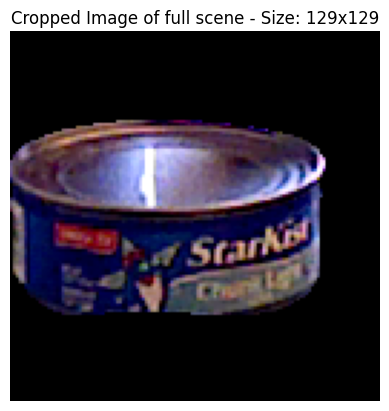

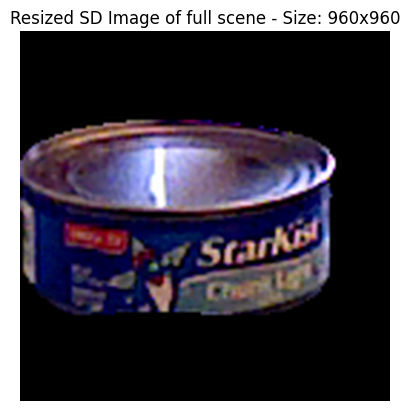

Shape of SD features: torch.Size([1, 1, 3600, 384])
Shape of DINO features: torch.Size([1, 1, 3600, 768])
Shape of SD-DINO features: torch.Size([1, 1, 3600, 1152])


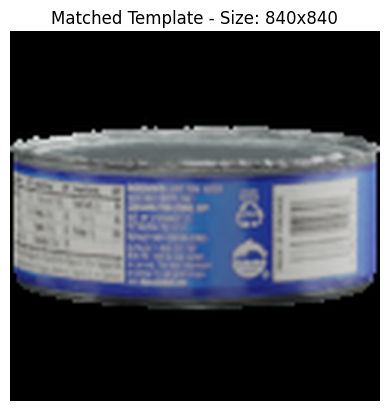

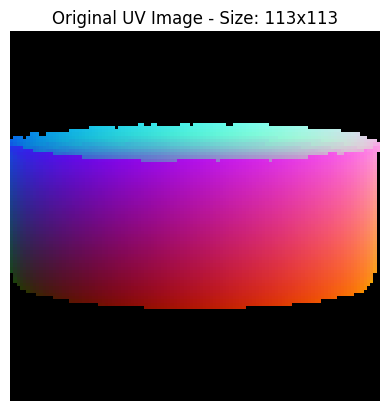

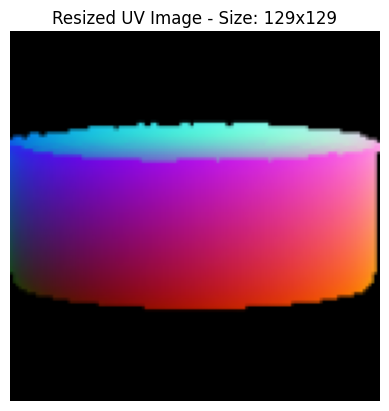

valid points 1
[(35, 44), (35, 69), (37, 41), (37, 63), (37, 72), (39, 78), (41, 22), (41, 44), (41, 72), (41, 91), (44, 67), (48, 82), (48, 99), (50, 87), (52, 72), (54, 95), (54, 97), (56, 59), (59, 31), (59, 33), (59, 61), (59, 87), (59, 89), (61, 20), (61, 54), (33, 84), (29, 52), (31, 37), (31, 41), (31, 44), (31, 50), (31, 72), (31, 76), (33, 67), (33, 69), (33, 78), (35, 50), (35, 72), (39, 106), (89, 69), (91, 76), (91, 95), (93, 35), (95, 69), (95, 72), (97, 63), (97, 69), (41, 7), (46, 3), (91, 102), (91, 104), (93, 13), (95, 13), (95, 18), (95, 97), (97, 16), (97, 18), (48, 110), (52, 108), (59, 106), (63, 110), (67, 108), (78, 110), (80, 108), (84, 106), (87, 106), (56, 99), (61, 13), (61, 87), (61, 89), (61, 99), (63, 13), (63, 20), (63, 80), (63, 87), (63, 97), (63, 99), (65, 16), (65, 20), (65, 87), (65, 91), (67, 13), (67, 31), (67, 74), (67, 82), (67, 87), (69, 72), (69, 80), (69, 84), (72, 22), (74, 46), (76, 26), (78, 29), (80, 18), (80, 20), (80, 26), (80, 33), (82,

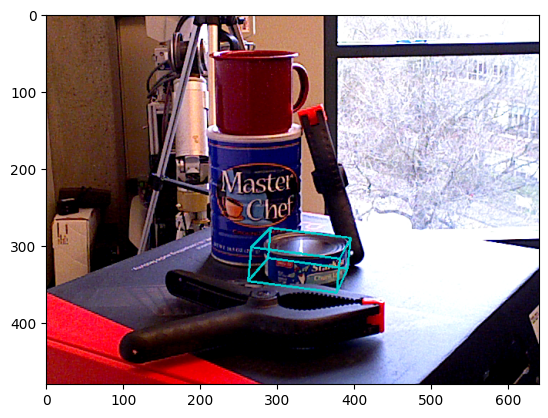

Pose estimation time: 7.079728126525879
R_est: [[ 0.97733534  0.19694914  0.07763164]
 [ 0.11484283 -0.18519474 -0.97596825]
 [-0.17783913  0.9627637  -0.20361556]]
t_est: [ 14.47959933  58.22636049 819.5870055 ]


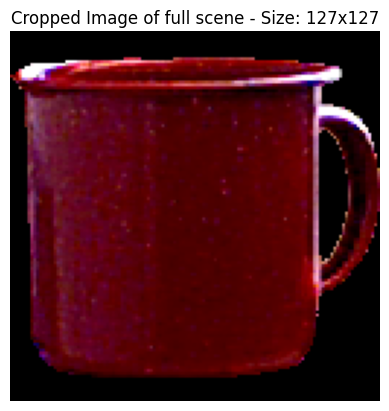

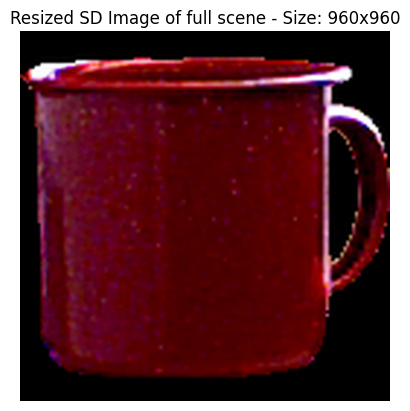

Shape of SD features: torch.Size([1, 1, 3600, 384])
Shape of DINO features: torch.Size([1, 1, 3600, 768])
Shape of SD-DINO features: torch.Size([1, 1, 3600, 1152])


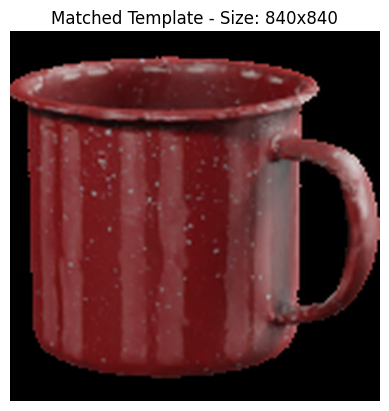

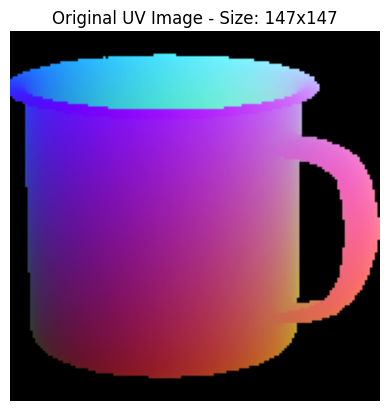

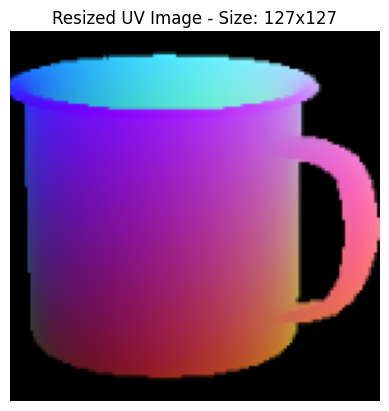

valid points 1
[(28, 43), (30, 26), (32, 39), (32, 53), (37, 39), (37, 45), (43, 30), (43, 41), (43, 43), (47, 39), (58, 34), (60, 26), (60, 34), (60, 62), (62, 41), (26, 94), (37, 96), (62, 98), (64, 94), (64, 96), (66, 96), (66, 100), (70, 94), (73, 96), (77, 96), (81, 98), (83, 96), (85, 94), (85, 102), (87, 98), (94, 94), (24, 111), (28, 117), (30, 106), (30, 115), (32, 104), (32, 106), (32, 109), (34, 104), (34, 117), (39, 111), (51, 115), (60, 104), (64, 104), (64, 121), (66, 104), (70, 104), (73, 113), (83, 106), (96, 104), (64, 39), (66, 28), (66, 41), (68, 37), (70, 20), (75, 47), (77, 22), (79, 24), (81, 26), (81, 37), (83, 15), (83, 26), (87, 26), (89, 41), (92, 22), (92, 41), (94, 28), (94, 45), (98, 28), (98, 39), (100, 43), (39, 3), (32, 66), (34, 79), (34, 85), (37, 79), (37, 81), (39, 89), (41, 83), (49, 68), (49, 81), (53, 79), (56, 70), (62, 70), (66, 75), (89, 87), (89, 89), (92, 79), (94, 81), (94, 83), (96, 70), (98, 68), (98, 87), (100, 77), (100, 87), (20, 9), (2

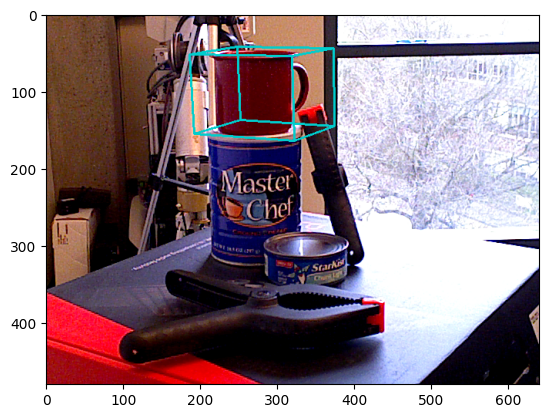

Pose estimation time: 7.043646335601807
R_est: [[ 0.88326064  0.46822259 -0.02486466]
 [ 0.09764764 -0.23555259 -0.9669436 ]
 [-0.45860177  0.85163524 -0.25377516]]
t_est: [ -24.01776258 -113.07454471  853.41680756]


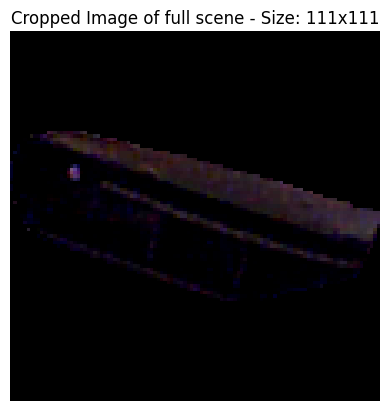

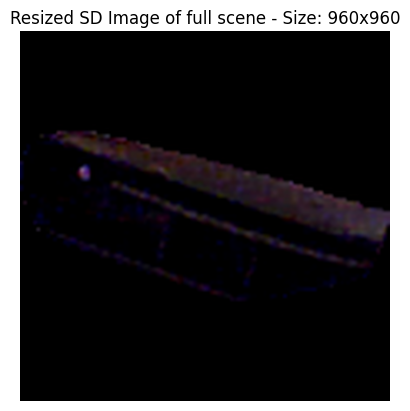

Shape of SD features: torch.Size([1, 1, 3600, 384])
Shape of DINO features: torch.Size([1, 1, 3600, 768])
Shape of SD-DINO features: torch.Size([1, 1, 3600, 1152])


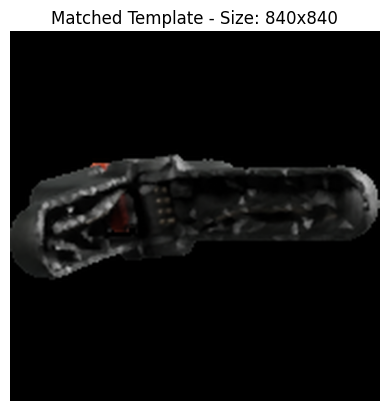

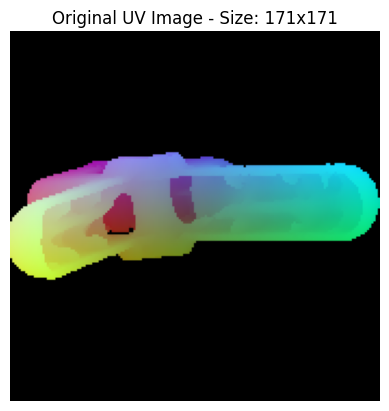

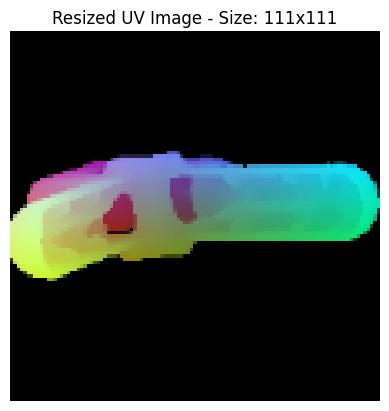

valid points 1
[(32, 32), (36, 36), (43, 43), (43, 69), (45, 34), (47, 87), (50, 37), (50, 58), (50, 95), (52, 47), (52, 73), (52, 93), (52, 106), (54, 52), (54, 108), (56, 82), (56, 95), (58, 82), (63, 76), (65, 78), (74, 52), (30, 13), (37, 24), (37, 28), (39, 28), (45, 30), (58, 37), (58, 89), (65, 106), (74, 97), (32, 6), (50, 2), (52, 0), (58, 6), (63, 110), (73, 104), (78, 80), (78, 82)]
valid points 1 after transformation
[[ 32.  32.]
 [ 36.  36.]
 [ 43.  43.]
 [ 43.  69.]
 [ 45.  34.]
 [ 47.  87.]
 [ 50.  37.]
 [ 50.  58.]
 [ 50.  95.]
 [ 52.  47.]
 [ 52.  73.]
 [ 52.  93.]
 [ 52. 106.]
 [ 54.  52.]
 [ 54. 108.]
 [ 56.  82.]
 [ 56.  95.]
 [ 58.  82.]
 [ 63.  76.]
 [ 65.  78.]
 [ 74.  52.]
 [ 30.  13.]
 [ 37.  24.]
 [ 37.  28.]
 [ 39.  28.]
 [ 45.  30.]
 [ 58.  37.]
 [ 58.  89.]
 [ 65. 106.]
 [ 74.  97.]
 [ 32.   6.]
 [ 50.   2.]
 [ 52.   0.]
 [ 58.   6.]
 [ 63. 110.]
 [ 73. 104.]
 [ 78.  80.]
 [ 78.  82.]]


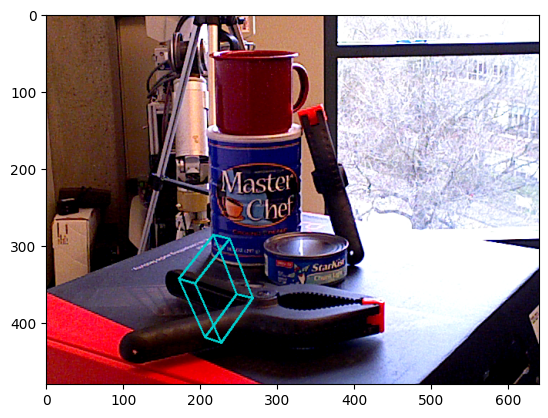

Pose estimation time: 6.781206846237183
R_est: [[ 0.48123138  0.2267045  -0.84677118]
 [-0.652683    0.73750268 -0.17347823]
 [ 0.58516772  0.63615632  0.5028756 ]]
t_est: [  135.46449675  -172.7812385  -1595.5426933 ]


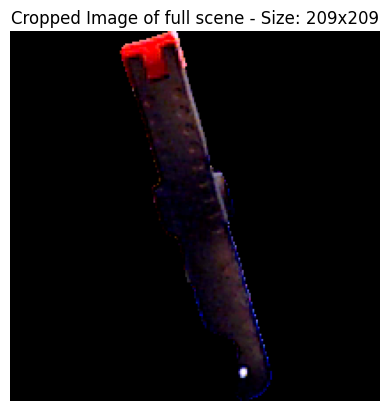

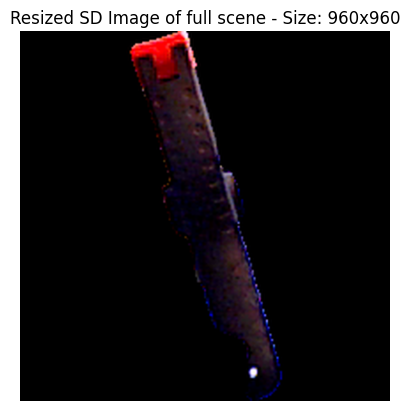

Shape of SD features: torch.Size([1, 1, 3600, 384])
Shape of DINO features: torch.Size([1, 1, 3600, 768])
Shape of SD-DINO features: torch.Size([1, 1, 3600, 1152])


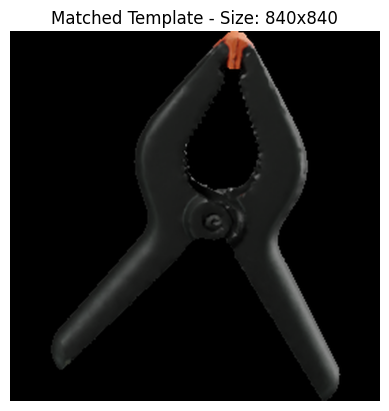

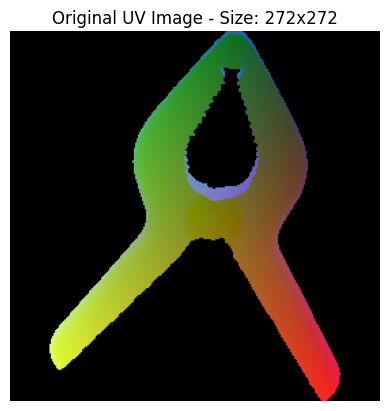

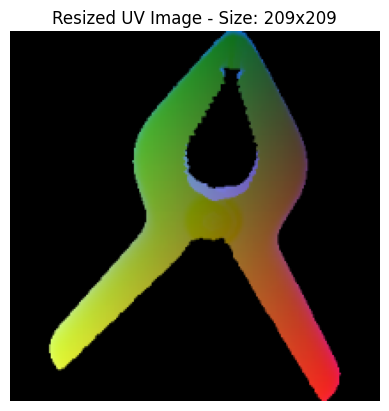

valid points 1
[(40, 88), (71, 109), (141, 102), (148, 106), (165, 116), (165, 130), (165, 137), (186, 127), (189, 137), (189, 144), (196, 144), (196, 148), (203, 127), (5, 78), (5, 81), (26, 78), (29, 81), (36, 71), (15, 95), (29, 99), (88, 116), (95, 88)]
valid points 1 after transformation
[[ 40.  88.]
 [ 71. 109.]
 [141. 102.]
 [148. 106.]
 [165. 116.]
 [165. 130.]
 [165. 137.]
 [186. 127.]
 [189. 137.]
 [189. 144.]
 [196. 144.]
 [196. 148.]
 [203. 127.]
 [  5.  78.]
 [  5.  81.]
 [ 26.  78.]
 [ 29.  81.]
 [ 36.  71.]
 [ 15.  95.]
 [ 29.  99.]
 [ 88. 116.]
 [ 95.  88.]]


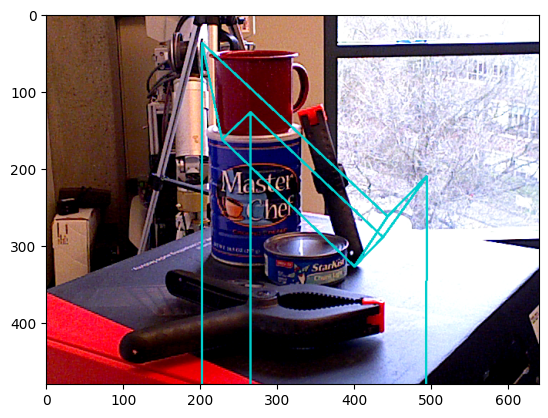

Pose estimation time: 6.912228345870972
R_est: [[-0.01586707 -0.71591496  0.69800717]
 [ 0.22583252 -0.68262194 -0.69500141]
 [ 0.97403691  0.14660509  0.17250809]]
t_est: [ 14.39511284 -34.68343928 627.09774673]


In [4]:
import cv2
from PIL import Image
import pose_utils.img_utils as img_utils
import pose_utils.vis_utils as vis_utils
import numpy as np
import time
import matplotlib.pyplot as plt
import torch


# Loading a ground truth file to access segmentation masks to test zs6d:
with open(os.path.join(config['gt_path']), 'r') as f:
    data_gt = json.load(f)

img_id = '000048_1' # for ycbv
#img_id = '36' # for lmo

device = 'cuda' if torch.cuda.is_available() else 'cpu'

patch_size = 14 #extractor.model.patch_embed.patch_size[0]
num_patches = int(patch_size / stride * (image_size_dino // patch_size))



for i in range(len(data_gt[img_id])):
    obj_number = i
    obj_id = data_gt[img_id][obj_number]['obj_id']
    cam_K = np.array(data_gt[img_id][obj_number]['cam_K']).reshape((3,3))
    bbox = data_gt[img_id][obj_number]['bbox_visib']

    img_path = "./test/000002.png"
    img = Image.open(img_path)

    mask = data_gt[img_id][obj_number]['mask_sam']
    mask = img_utils.rle_to_mask(mask)
    mask = mask.astype(np.uint8)

    start_time = time.time()
    
    # To estimate the objects Rotation R and translation t the input image, the object_id, a segmentation mask and camera matrix are necessary
    R_est, t_est = pose_estimator_sd_dino.get_pose(num_patches, img, str(obj_id), mask, cam_K, bbox=None)

    end_time = time.time()
    
    out_img = vis_utils.draw_3D_bbox_on_image(np.array(img), R_est, t_est, cam_K, data_gt[img_id][obj_number]['model_info'], factor=1.0)

    plt.imshow(out_img)
    plt.show()
    print(f"Pose estimation time: {end_time-start_time}")
    print(f"R_est: {R_est}")
    print(f"t_est: {t_est}")
